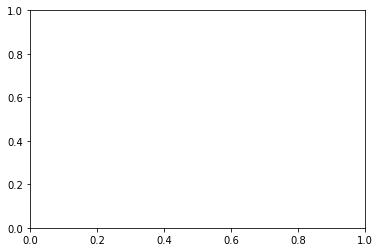

<Figure size 4320x4320 with 0 Axes>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.constants import k,e #in SI
import scipy.optimize as opt


(fig, graph) = plt.subplots()
plt.figure(figsize=(60, 60))
plt.style.use('seaborn-bright')

data_points = np.array([
      #Ns   #Is(A)
    [  14,   2.13 ],
    [  28,   3.05 ],
    [  42,   3.03 ],
    [  70,   2.72 ],
    [  94,   1.89 ],
    [ 122,   1.50 ],
    [ 140,   1.23 ]
])

x, y = data_points.T


In [2]:
line = np.polyfit(x, y, 1)
print("slope = ", line[1], "line = ", line)

slope =  3.1036627762602427 line =  [-0.0121091   3.10366278]


In [3]:
def func(x, a, b):
     return a / (x + b)

# The actual curve fitting happens here
optimizedParameters, pcov = opt.curve_fit(func, x, y);

# Use the optimized parameters to plot the best fit
# graph.plot(x, func(x, *optimizedParameters), label="fit");

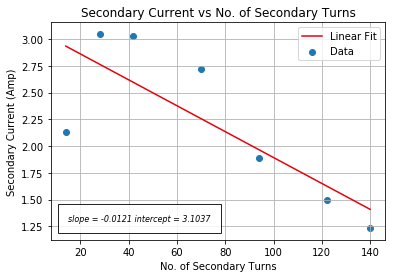

In [4]:
graph.scatter(x, y, label="Data")
graph.plot(x, x*line[0] + line[1], "C2", label="Linear Fit")
graph.grid()
graph.set(title='Secondary Current vs No. of Secondary Turns',
       ylabel='Secondary Current (Amp)',
       xlabel='No. of Secondary Turns'
)
graph.legend()
subtext = "slope = " + '%.4f'%line[0] + " intercept = " + '%.4f'%line[1]
graph.text(15, 1.30, subtext, style='italic', fontsize=8,
        bbox={'facecolor':'white', 'alpha':0.85, 'pad':10})


fig.savefig('is-vs-ns-loaded.png', dpi = 300)
fig